In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import re
from liftover import get_lifter
import seaborn as sns
import pyBigWig
import os
import pickle
sys.path.append("/home/yanhu/DddA/DddA/tdac_seq")
from ddda_dataset import *
from utils import *
%matplotlib inline

In [2]:
working_dir = "/home/yanhu/data/DddA/HJR240/"
plot_dir = os.path.join("/home/yanhu/data/DddA/HJR240/", "plot")
os.system("mkdir -p " + plot_dir)

0

In [3]:
# Create a dictionary for reference regions
ref_range_dict = {
    'HJR240_1': ('chr7', 107741812, 107745536),
    'HJR240_2': ('chr1', 170530445, 170533865),
    'HJR240_3': ('chr12', 54278171, 54281758),
    'HJR240_4': ('chr6', 31650899, 31654853),
    'HJR240_5': ('chr6', 30614173, 30618695),
    'HJR240_6': ('chr18', 36128277, 36131340),
    'HJR240_7': ('chr7', 135556509, 135559684),
    'HJR240_8': ('chr19', 55597022, 55601440),
    'HJR240_9': ('chr10', 69178554, 69181212),
    'HJR240_10': ('chr18', 3245143, 3248614)
}

# Initialize ddda_dataset
ddda_data = ddda_dataset(
    ID = "HJR_240", 
    region_dict = ref_range_dict, 
    genome_file = "/home/yanhu/data/DddA/shared/refGenomes/hg38.fa", 
    fastq_file = "/home/yanhu/data/DddA/HJR240/HJR240_1.fastq", 
    working_dir = "/home/yanhu/data/DddA/HJR240/"
)

# Load DddA bias model
bias_model_path = "/home/yanhu/data/DddA/HJR245/bias_dict.pkl"
ddda_data.load_bias_model(bias_model_path)

# Align reads
ddda_data.align_reads(start_gap_threshold=500,end_gap_threshold=500)

Loading reference genome
Extracting sequences for each locus
Computing sequence bias


100%|███████████████████████████████████| 59229/59229 [00:28<00:00, 2097.62it/s]


4668 reads aligned. 54561 reads unaligned


In [6]:
# Export data matrices
export_to_tsv(
    ddda_data, 
    export_DddA_edit=True, 
    export_del=False, 
    export_ABE_edit=False,
    export_dir="/home/yanhu/data/DddA/HJR240/data_export/")

Exporting DddA edits for dataset HJR_240 at locus HJR240_1
Exporting deletions for dataset HJR_240 at locus HJR240_1
Exporting aligned reads for dataset HJR_240 at locus HJR240_1
Exporting DddA edits for dataset HJR_240 at locus HJR240_2
Exporting deletions for dataset HJR_240 at locus HJR240_2
Exporting aligned reads for dataset HJR_240 at locus HJR240_2
Exporting DddA edits for dataset HJR_240 at locus HJR240_3
Exporting deletions for dataset HJR_240 at locus HJR240_3
Exporting aligned reads for dataset HJR_240 at locus HJR240_3
Exporting DddA edits for dataset HJR_240 at locus HJR240_4
Exporting deletions for dataset HJR_240 at locus HJR240_4
Exporting aligned reads for dataset HJR_240 at locus HJR240_4
Exporting DddA edits for dataset HJR_240 at locus HJR240_5
Current slot is None
Exporting deletions for dataset HJR_240 at locus HJR240_5
Current slot is None
Exporting aligned reads for dataset HJR_240 at locus HJR240_5
Current slot is None
Exporting DddA edits for dataset HJR_240 a

In [4]:
# Selecte reads to include for footprinting
selection_dict = {}
for locus in ref_range_dict.keys():
    selection_dict[locus] = []

    # For each locus, select reads with > 100 edits
    for read_ind in range(len(ddda_data.read_ids[locus])):
        if np.sum(ddda_data.edit_dict[locus][read_ind, :]) > 50:
            read_id = ddda_data.read_ids[locus][read_ind]
            selection_dict[locus].append(read_id)

    # Deduplication
    if len(selection_dict[locus]) > 0:
        selection_dict[locus] = ddda_data.dedup_reads(
            locus = locus, 
            read_ids = selection_dict[locus]
        )

100%|████████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 7006.39it/s]
25it [00:00, 360335.40it/s]
100%|██████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 6732.43it/s]
6it [00:00, 87078.98it/s]
100%|████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 7389.54it/s]
20it [00:00, 320175.88it/s]
100%|██████████████████████████████████████████████████████████████████████| 113/113 [00:00<00:00, 7244.05it/s]
113it [00:00, 763214.74it/s]
100%|████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 8020.98it/s]
24it [00:00, 271329.64it/s]
100%|████████████████████████████████████████████████████████████████████████| 23/23 [00:00<00:00, 7705.19it/s]
23it [00:00, 312197.39it/s]
100%|██████████████████████████████████████████████████████████████████████| 153/153 [00:00<00:00, 7141.74it/s]
153it [00:00, 882707.72it/s]
100%|███████████████

In [5]:
footprints_dict = ddda_data.get_footprints(
    selection_dict, 
    footprint_radii = np.arange(1,101),
    combine_sides="max_pval"
)

Computing footprints for HJR240_1


100%|██████████████████████████████████████████████████████████████████████████| 25/25 [00:03<00:00,  6.46it/s]


Computing footprints for HJR240_2


100%|████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  6.75it/s]


Computing footprints for HJR240_3


100%|██████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  6.33it/s]


Computing footprints for HJR240_4


100%|██████████████████████████████████████████████████████████████████████████| 87/87 [00:14<00:00,  5.96it/s]


Computing footprints for HJR240_5


0it [00:00, ?it/s]


Computing footprints for HJR240_6


100%|██████████████████████████████████████████████████████████████████████████| 23/23 [00:03<00:00,  7.09it/s]


Computing footprints for HJR240_7


100%|██████████████████████████████████████████████████████████████████████████| 23/23 [00:03<00:00,  6.82it/s]


Computing footprints for HJR240_8


100%|██████████████████████████████████████████████████████████████████████████| 68/68 [00:13<00:00,  5.07it/s]


Computing footprints for HJR240_9


100%|██████████████████████████████████████████████████████████████████████████| 11/11 [00:01<00:00,  6.87it/s]


Computing footprints for HJR240_10


100%|██████████████████████████████████████████████████████████████████████████| 70/70 [00:12<00:00,  5.49it/s]


HJR240_1


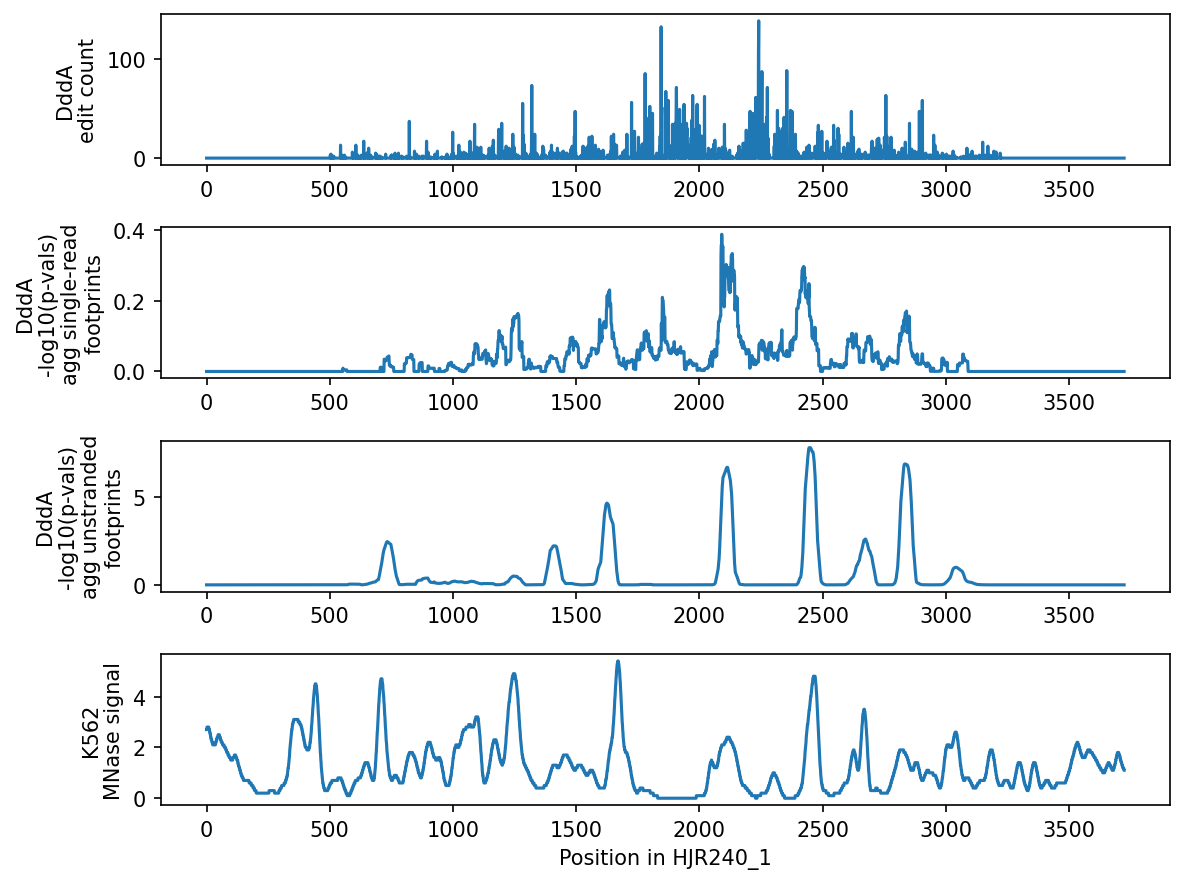

HJR240_2


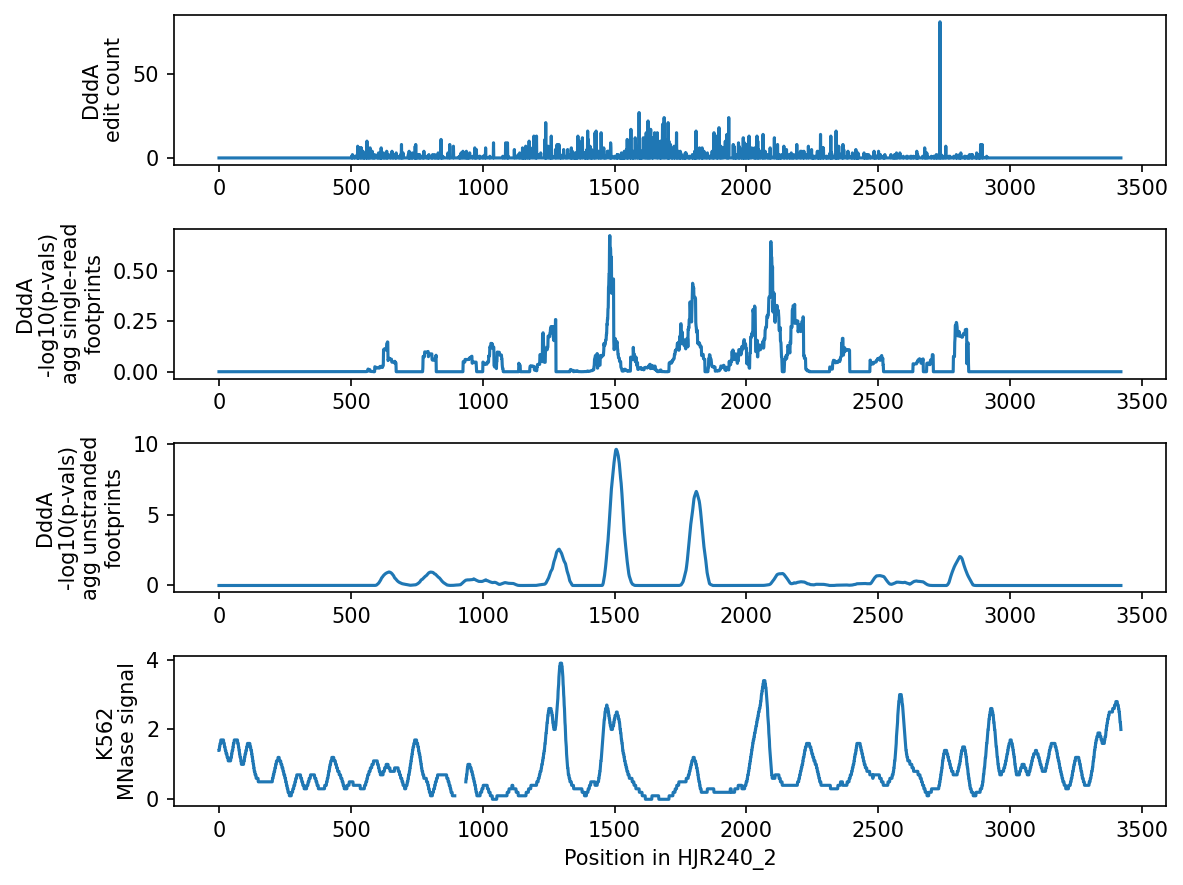

HJR240_3


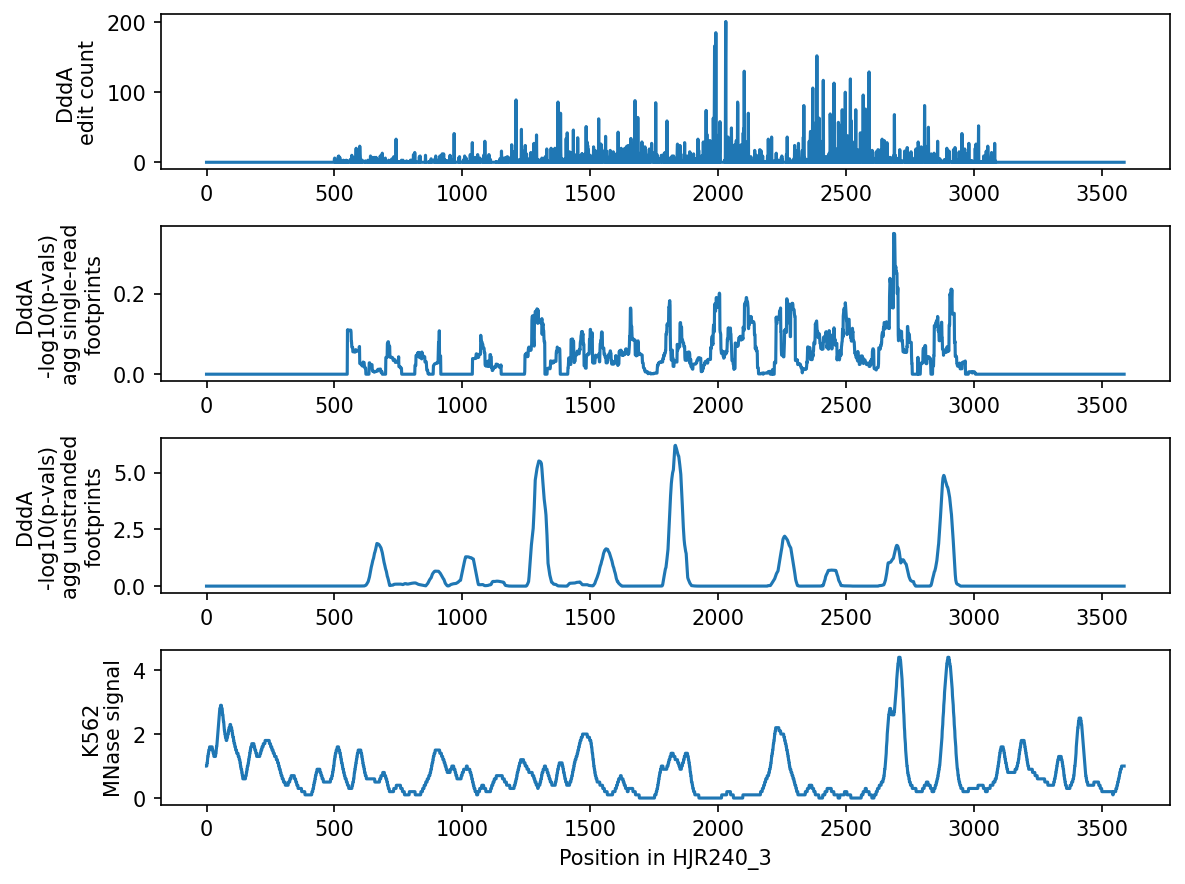

HJR240_4


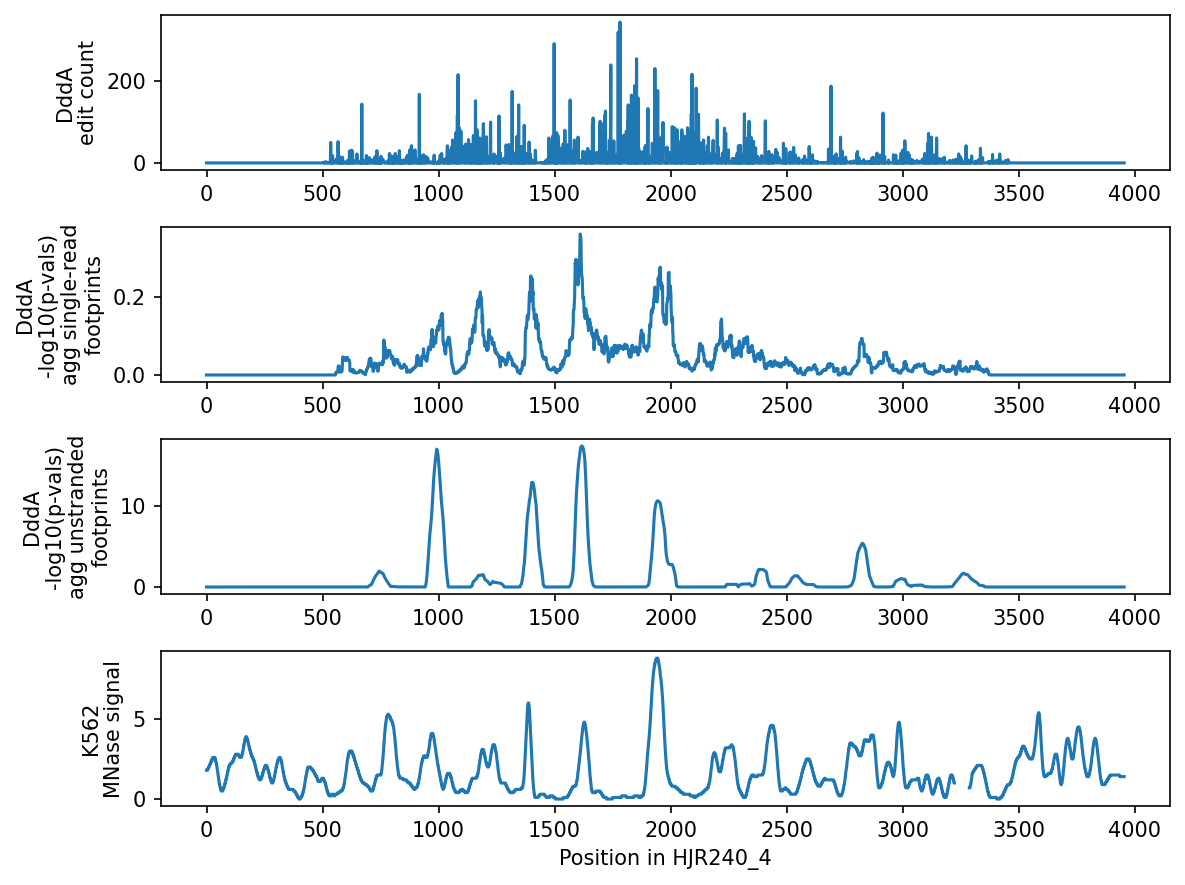

HJR240_5
HJR240_6


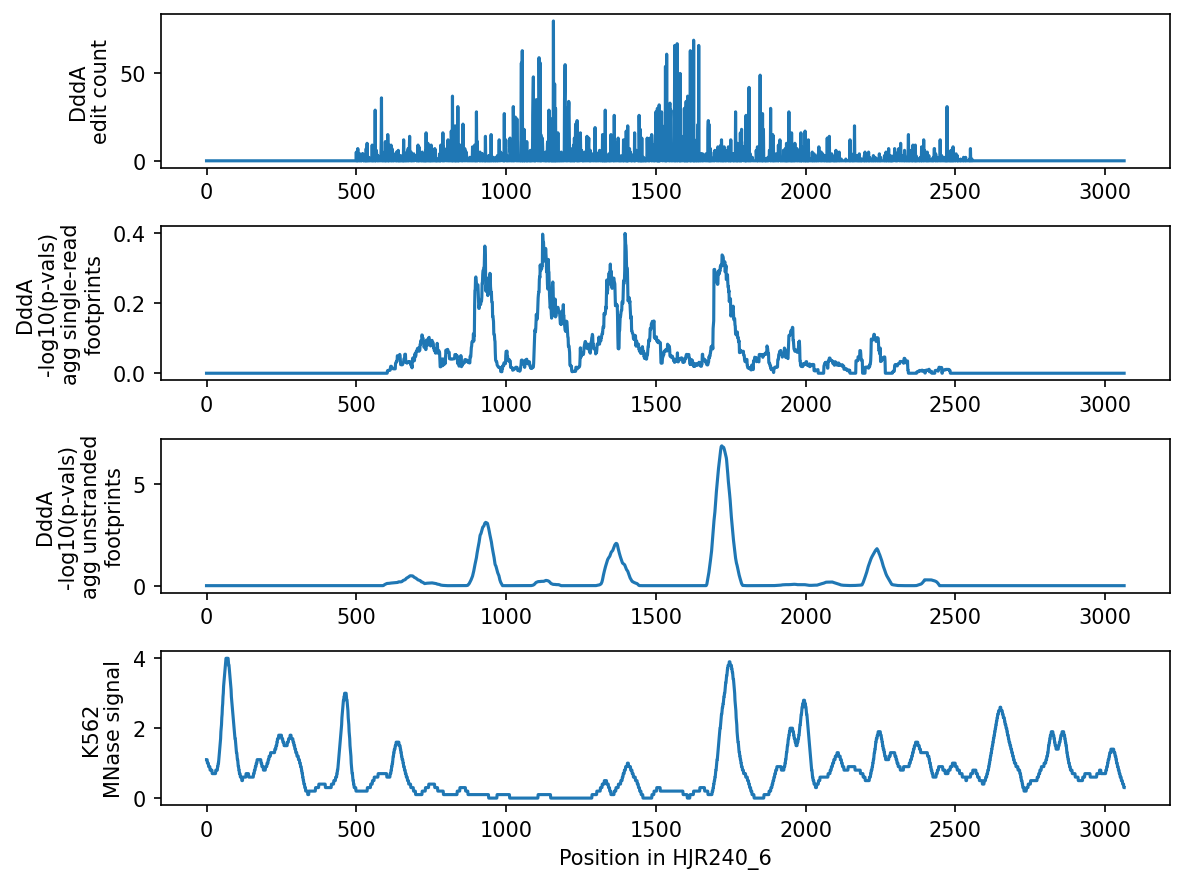

HJR240_7


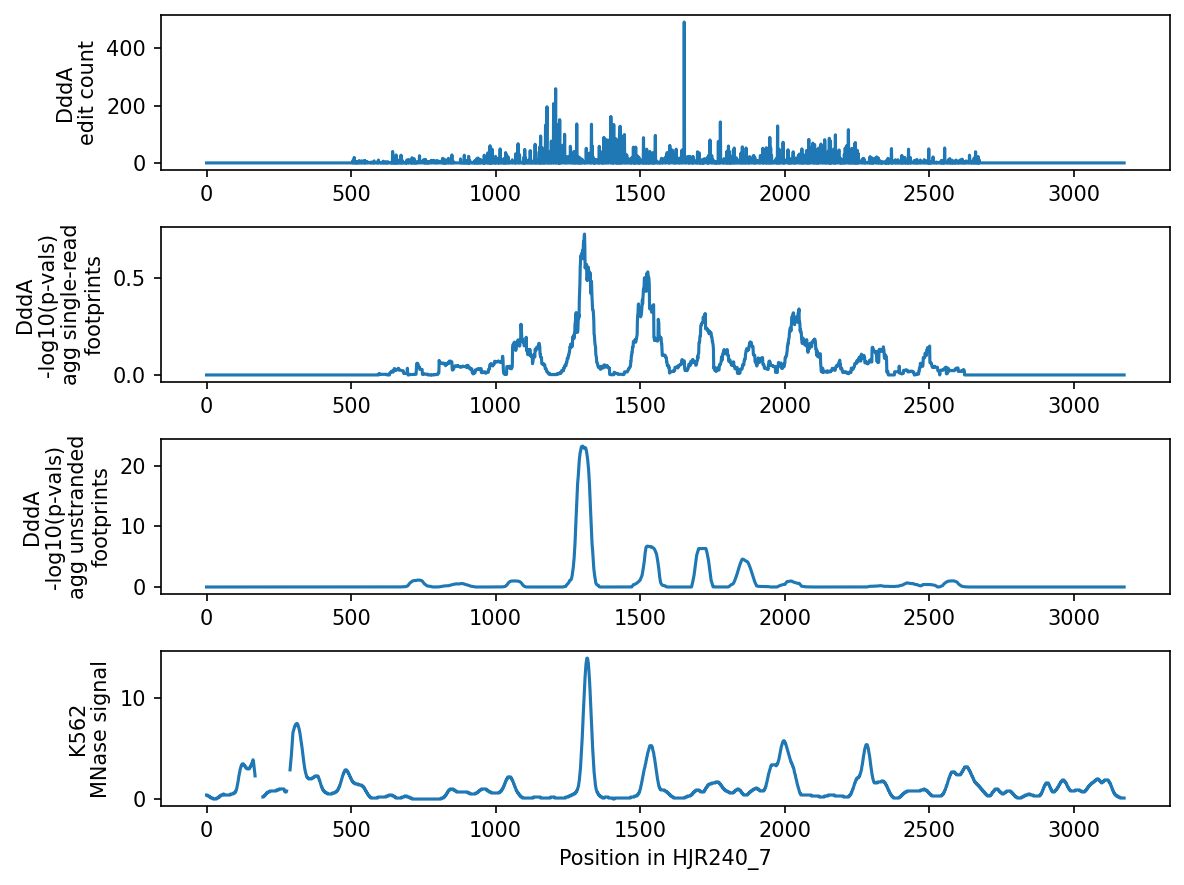

HJR240_8


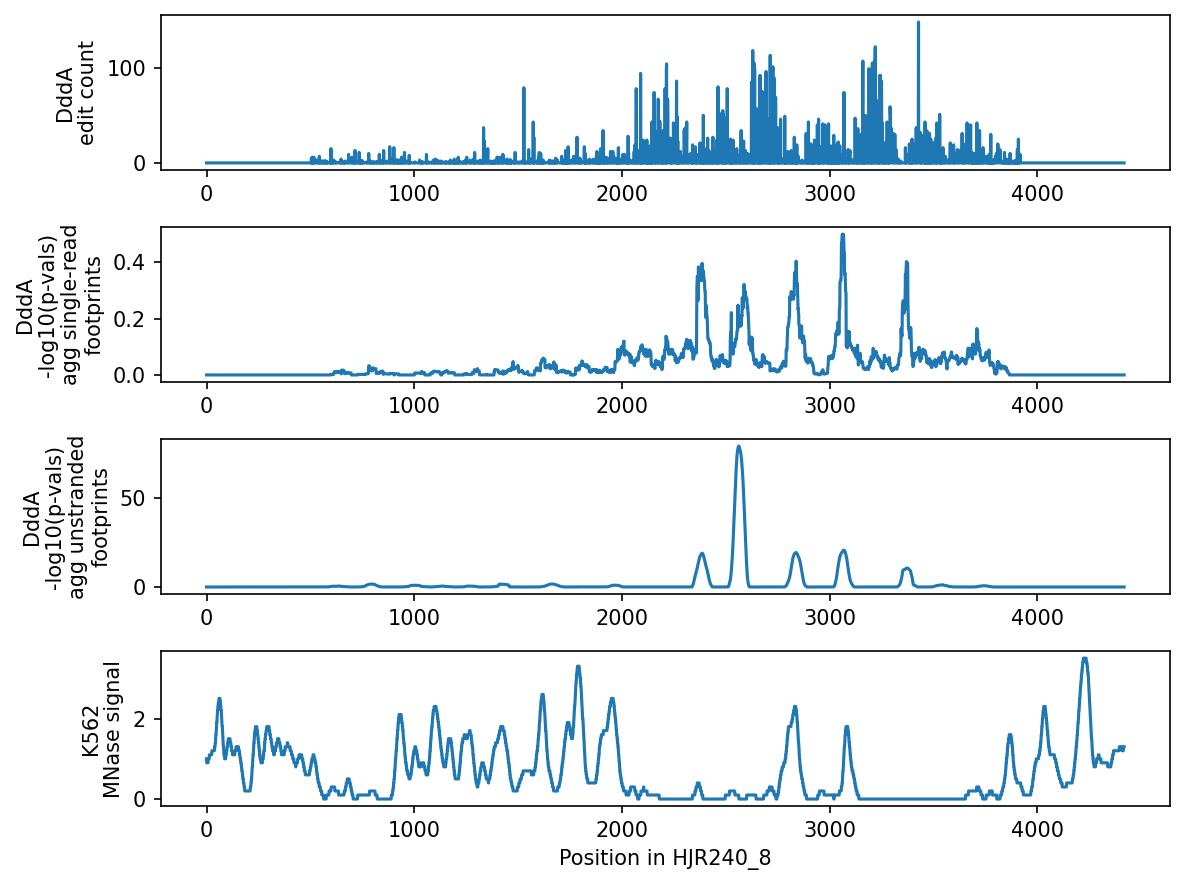

HJR240_9


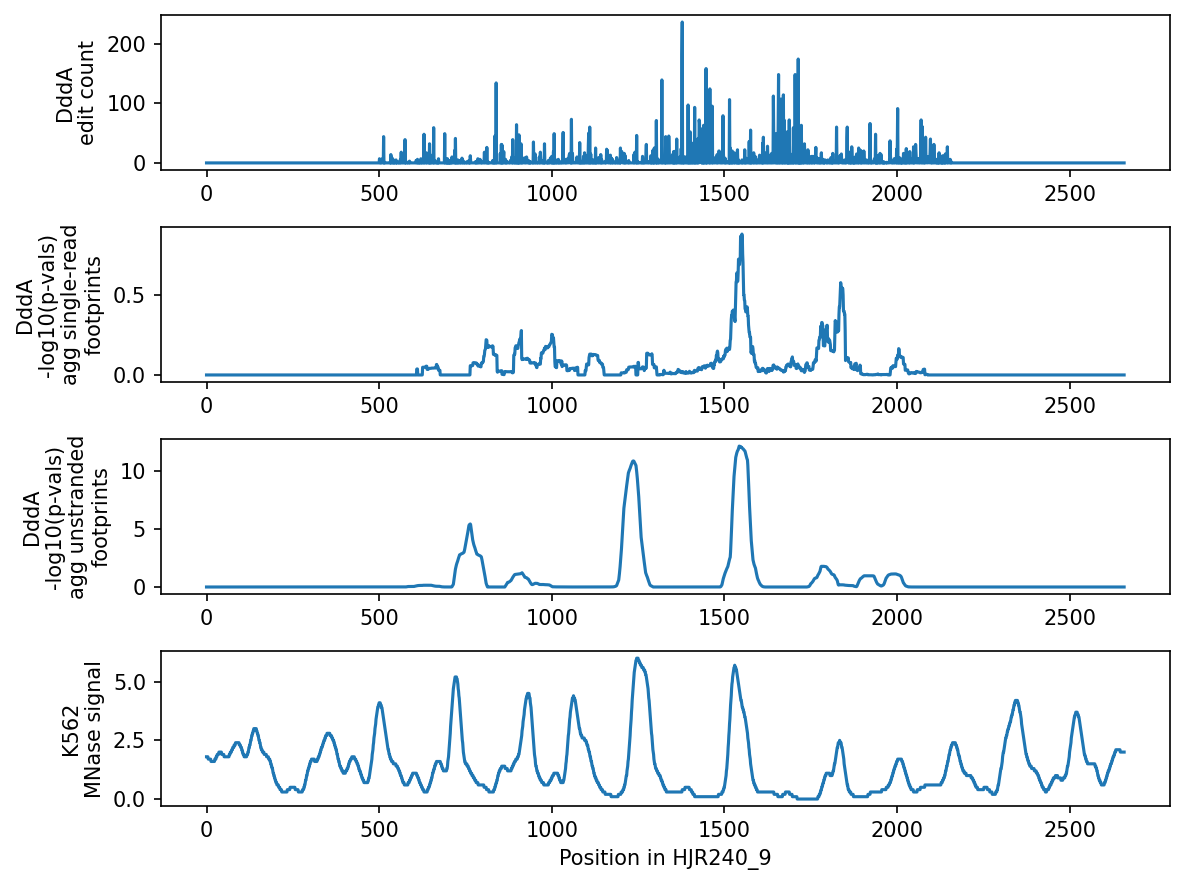

HJR240_10


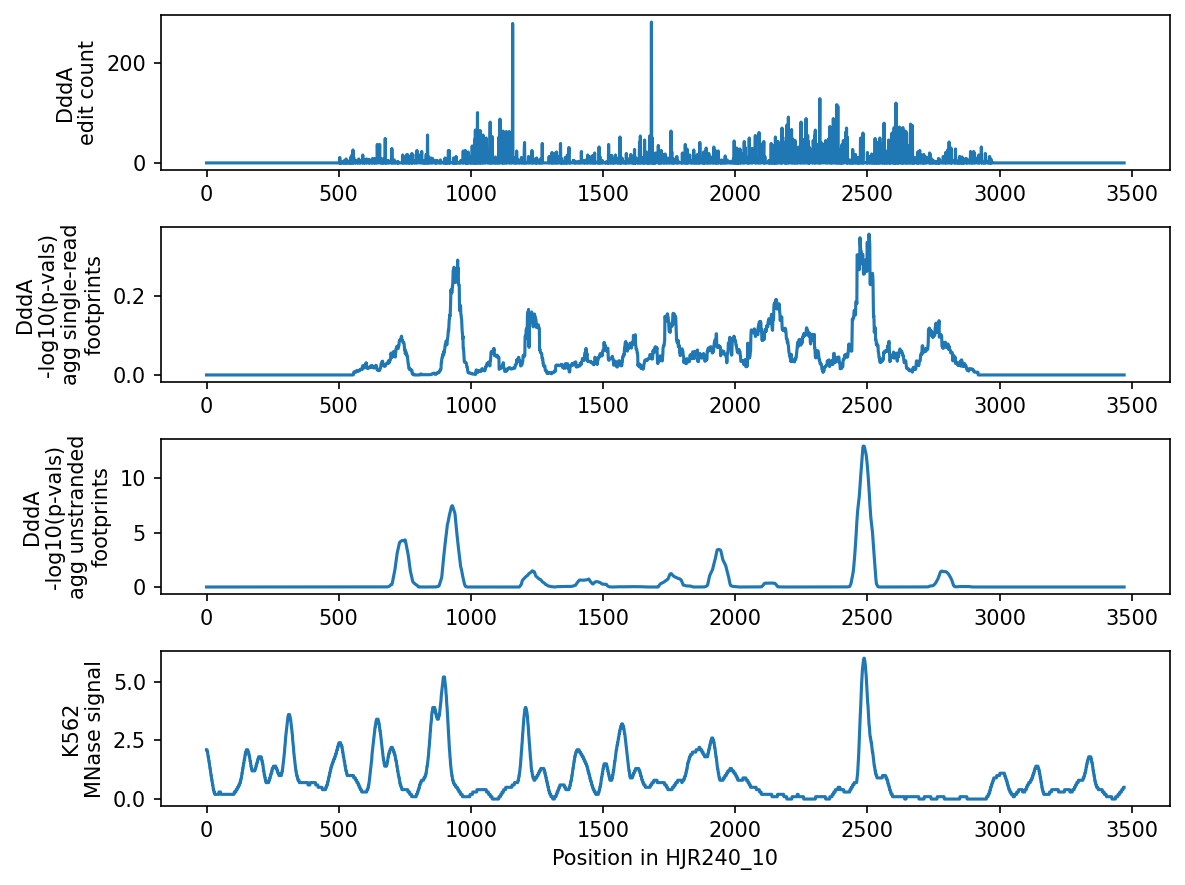

In [6]:
# Load MNase data
bw = pyBigWig.open("/home/yanhu/data/DddA/HJR240/ENCFF000VNN.bigWig")

for locus in ref_range_dict:

    print(locus)
    
    # Skip loci without any reads passing filter
    if len(ddda_data.read_ids[locus]) == 0:
        continue
    
    # Get genomic coordinate of current region in hg38
    chr = ref_range_dict[locus][0]
    start = ref_range_dict[locus][1] - 1
    end = ref_range_dict[locus][2]
    
    # Lift over to hg19
    converter = get_lifter('hg38', 'hg19')
    chrom = chr[3:]
    start = converter[chrom][start][0][1]
    end = converter[chrom][end][0][1]
    
    # Retrieve and aggregate footprints from single reads
    agg_footprints = np.mean(-np.log10(np.array(list(footprints_dict[locus].values())))[:, 50, :], axis=0)
    
    # Retrieve aggregate edits
    agg_edits = np.array(np.sum(ddda_data.edit_dict[locus], axis=0))[0, :]
    
    # Combine the edits and bias of both strands to call footprints
    strands = ddda_data.read_strands[locus]
    C_to_T_bias = ddda_data.bias_dict[locus][:, 0]
    G_to_A_bias = ddda_data.bias_dict[locus][:, 1]
    agg_bias = C_to_T_bias * np.mean(strands == 0) + G_to_A_bias * np.mean(strands == 1) # Weight both strands
    unstranded_footprints = -np.log10(get_footprint_single_scale(
        agg_edits, agg_bias, fp_radius=50, combine_sides="max_pval"
        ) + 1e-300)

    # Smoothe track
    smooth_radius = 50
    unstranded_footprints = np.convolve(unstranded_footprints, np.ones(smooth_radius), mode="same") / smooth_radius

    # Visualize results
    fig, ax = plt.subplots(4, dpi = 150, figsize = (8,6))
    ax[0].plot(agg_edits)
    ax[0].set_ylabel("DddA\nedit count")
    ax[1].plot(np.arange(len(agg_footprints)), agg_footprints)
    ax[1].set_ylabel("DddA\n-log10(p-vals)\nagg single-read\nfootprints")
    ax[2].plot(np.arange(len(unstranded_footprints)), unstranded_footprints)
    ax[2].set_ylabel("DddA\n-log10(p-vals)\nagg unstranded\nfootprints")
    ax[3].plot(np.arange(len(agg_footprints)), bw.values(chr, start, end))
    ax[3].set_xlabel("Position in " + locus)
    ax[3].set_ylabel("K562\nMNase signal")
    fig.tight_layout()
    plt.savefig(os.path.join(plot_dir, locus + "_single_read_nuc_footprints_MNase_comparision.pdf"))
    plt.show()